<a href="https://colab.research.google.com/github/adagora/project-3/blob/master/W3_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
import seaborn as sns

In [109]:
df = pd.read_csv('creditcard.csv')
df.head()
print(df.describe())



                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


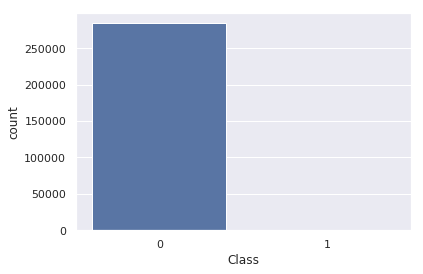

In [110]:
%matplotlib inline
sns.countplot(x='Class', data=df)

In [0]:
fraud = train_transaction.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_fraud))

492
284315


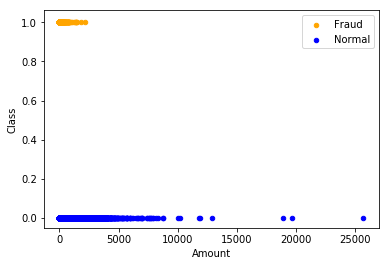

In [0]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_fraud.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

In [0]:
# chose column
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# ours target, we want to predict
target = 'Class'

#create
X = df[features]
y = df[target]

In [0]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X
    

In [0]:
# Define the model

model = LogisticRegression(C=1e5)

# Define the splitter for spliting data in train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
  #Select the train and test data
  X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
  X_test, y_test =X.iloc[test_indices], y.iloc[test_indices]
  
  # Normalize the data
  X_train = normalize(X_train)
  X_test = normalize(X_test)
  
  # Fit & Predict
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Result
  print(classification_report(y_test, y_pred))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.88      0.61      0.72       246

    accuracy                           1.00    142404
   macro avg       0.94      0.80      0.86    142404
weighted avg       1.00      1.00      1.00    142404



In [113]:
from sklearn.metrics import recall_score,accuracy_score
print(recall_score(y_test,y_pred,average=None))
print(accuracy_score(y_test,y_pred))

[0.99985931 0.6097561 ]
0.9991854161399961


In [0]:
# algorithm is performing extremely well
# So our model is not doing a good job of recognising frauds, only .61% for 1. It means fraud

In [0]:

# Undersample the data. To improve the recall, let's implement undersampling. Here the code is trying to reduce the number of non fraudulent transactions equivalent to fraudulent ones.
no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]

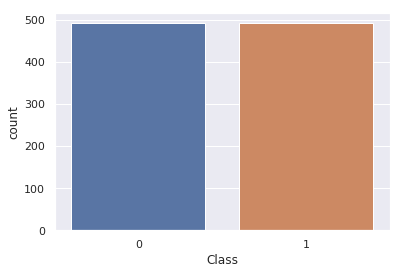

In [116]:
%matplotlib inline
sns.countplot(x='Class', data=under_sample)

In [0]:
from sklearn.model_selection import train_test_split
X_under = under_sample.loc[:,under_sample.columns != 'Class']
y_under = under_sample.loc[:,under_sample.columns == 'Class']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)

In [122]:
lr_under = LogisticRegression()
lr_under.fit(X_under_train,y_under_train)
y_under_pred = lr_under.predict(X_under_test)
print(recall_score(y_under_test,y_under_pred))
print(accuracy_score(y_under_test,y_under_pred))

0.8979591836734694
0.9459459459459459


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
lr_balanced = LogisticRegression(class_weight = 'balanced')
lr_balanced.fit(X_train,y_train)
y_balanced_pred = lr_balanced.predict(X_test)
print(recall_score(y_test,y_balanced_pred))
print(accuracy_score(y_test,y_balanced_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9065040650406504
0.9797337153450746


In [0]:
#BALANCED#
# accuracy really good 98%
# recall score really good 90%

In [127]:
from sklearn.metrics import confusion_matrix

confusion_matrix_value = confusion_matrix(y_test,y_balanced_pred)
sns.set(font_scale=1.4)
confusion_matrix_value
#sns.heatmap(confusion_matrix_value, annot=True)

array([[139295,   2863],
       [    23,    223]])

In [149]:
import pandas as pd

df_confusion = pd.crosstab(y_test, y_balanced_pred,  rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,0,1,All
Actual,,,
0,139295,2863,142158
1,23,223,246
All,139318,3086,142404
